This section imports the essential libraries for building and visualizing a Convolutional Neural Network (CNN):

- **%matplotlib widget** enables interactive plotting within the notebook.  
- **idx2numpy** reads image datasets stored in `.idx` format (e.g., MNIST).  
- **NumPy**, **Matplotlib**, and **Seaborn** are used for data manipulation and visualization.  
- **Scikit-learn’s confusion_matrix** helps evaluate model performance.  
- **TensorFlow Keras** modules provide tools to build, train, and evaluate CNN models:
  - `Sequential`: builds models layer by layer.  
  - `Conv2D`, `MaxPooling2D`: extract and reduce spatial features from images.  
  - `Flatten`, `Dense`, `Dropout`: form the fully connected layers for classification and regularization.  
  - `to_categorical`: converts class labels into one-hot encoded vectors for training.

TensorFlow automatically detects and initializes the available GPU (e.g., NVIDIA GeForce MX350) with CUDA and cuDNN support, as shown in the logs.


In [1]:
%matplotlib widget
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

2025-10-27 12:51:27.331398: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 12:51:27.681010: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-27 12:51:29.006073: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


This section downloads the MNIST dataset directly from **Kaggle** using the `kagglehub` library:

- **import kagglehub**: loads the Kaggle Hub API, which allows you to download datasets from Kaggle without manually using the Kaggle CLI.  
- **dataset_download("hojjatk/mnist-dataset")**: fetches the latest version of the MNIST dataset from the Kaggle repository created by *hojjatk*.  
- **path**: stores the local directory path where the dataset files are saved.  
- **print("Path to dataset files:", path)**: displays the local file path so you can verify where the dataset has been downloaded.

This makes it easy to programmatically access Kaggle datasets and integrate them directly into your notebook workflow.


In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


This section accesses and lists the contents of the MNIST dataset directory:

- **import os**: imports the operating system module, which provides functions for interacting with the file system.  
- **path = "/home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1"**: specifies the local directory where the MNIST dataset was downloaded. You should replace this with your own dataset path if it differs.  
- **os.listdir(path)**: returns a list of all files and folders inside the specified directory.  
- **print(os.listdir(path))**: prints the list of dataset files (e.g., training images, test images, and labels) so you can verify that the data has been successfully downloaded.

This helps confirm that the dataset files are correctly stored and accessible for further processing.


In [2]:
import os

path = "/home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1"#here you replace with your own path
print(os.listdir(path))


['t10k-images-idx3-ubyte', 'train-labels.idx1-ubyte', 't10k-labels.idx1-ubyte', 'train-images-idx3-ubyte', 't10k-images.idx3-ubyte', 'train-labels-idx1-ubyte', 'train-images.idx3-ubyte', 't10k-labels-idx1-ubyte']


This section loads the MNIST dataset files from the local directory into NumPy arrays:

- **train_images_path**, **train_labels_path**, **test_images_path**, and **test_labels_path**: specify the file paths for the MNIST training and test images and their corresponding label files. Each file uses the `.idx` format.  

- **idx2numpy.convert_from_file()**: reads the `.idx` files and converts them into NumPy arrays:
  - `x_train`: contains the training images.  
  - `y_train`: contains the corresponding labels for the training images.  
  - `x_test`: contains the test images.  
  - `y_test`: contains the corresponding labels for the test images.  

- **print()** statements display the shapes of the loaded arrays to verify that the data has been correctly imported:
  - `x_train.shape` and `x_test.shape` show the number of images and their dimensions.  
  - `y_train.shape` confirms the number of labels matches the number of training images.

This step ensures that the dataset is properly loaded and ready for preprocessing before model training.


In [3]:
train_images_path = "/home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-images.idx3-ubyte"
train_labels_path = "/home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-labels.idx1-ubyte"
test_images_path = "/home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-images.idx3-ubyte"
test_labels_path = "/home/gato/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-labels.idx1-ubyte"

# Load data
x_train = idx2numpy.convert_from_file(train_images_path)
y_train = idx2numpy.convert_from_file(train_labels_path)
x_test = idx2numpy.convert_from_file(test_images_path)
y_test = idx2numpy.convert_from_file(test_labels_path)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Labels shape:", y_train.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Labels shape: (60000,)


This section visualizes sample images from the MNIST training dataset:

- **plt.figure(figsize=(8,8))**: creates a new figure with a size of 8x8 inches for displaying the images.  
- **for i in range(9):** loops through the first nine training images.  
- **plt.subplot(3,3,i+1)**: creates a 3×3 grid of subplots to display nine images in a single figure.  
- **plt.imshow(x_train[i].reshape(28,28), cmap='gray')**: displays each image by reshaping it to 28×28 pixels and using a grayscale color map.  
- **plt.title(f"Label: {y_train[i]}")**: adds the corresponding digit label above each image.  
- **plt.axis('off')**: hides the axis ticks for a cleaner display.  
- **plt.suptitle("Sample Digits from the MNIST Dataset", fontsize=16)**: adds a main title to the entire figure.  
- **plt.show()**: renders and displays the plot.

This visualization helps confirm that the dataset has been correctly loaded and the images correspond to the correct labels.


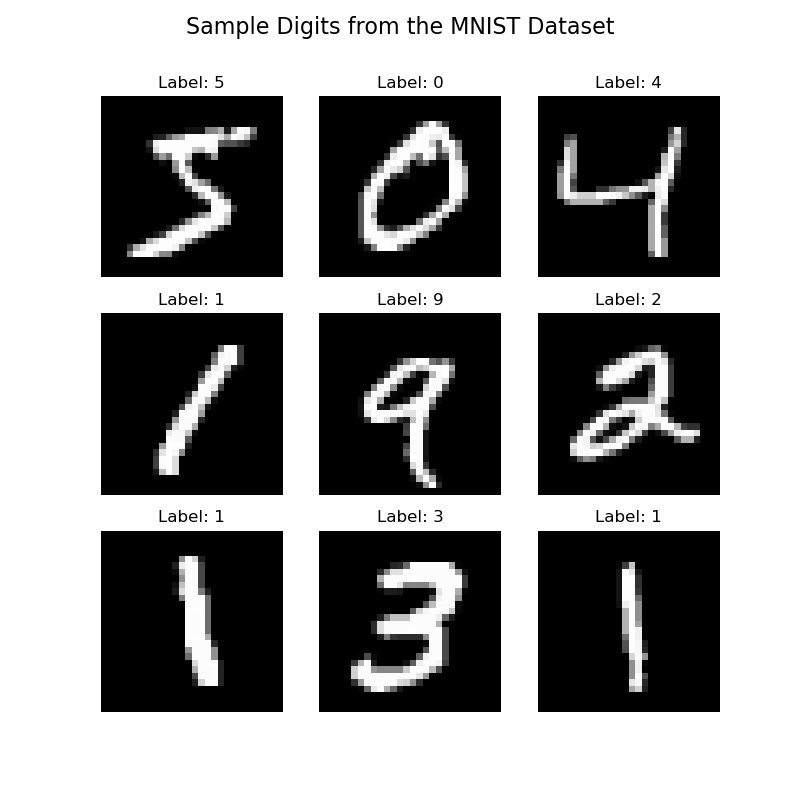

In [4]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from the MNIST Dataset", fontsize=16)
plt.show()


### 📊 

This section visualizes the pixel intensity distribution of one MNIST image before normalization:

- **plt.figure(figsize=(6, 4))**: creates a figure with dimensions 6×4 inches.  
- **plt.hist(x_train[0].reshape(-1), bins=50, color='blue', alpha=0.7)**: flattens the first training image into a 1D array and plots a histogram with 50 bins to show how frequently each pixel value appears. The blue color and transparency (`alpha=0.7`) make the plot easy to read.  
- **plt.title("Pixel Intensity Distribution (Before Normalization)")**: adds a descriptive title.  
- **plt.xlabel("Pixel value")** and **plt.ylabel("Count")**: label the x-axis (pixel intensities ranging from 0 to 255) and y-axis (number of pixels with that intensity).  
- **plt.show()**: displays the histogram.

This visualization provides insight into the grayscale intensity distribution of the raw image data before normalization, helping you understand how pixel values are spread across different brightness levels.


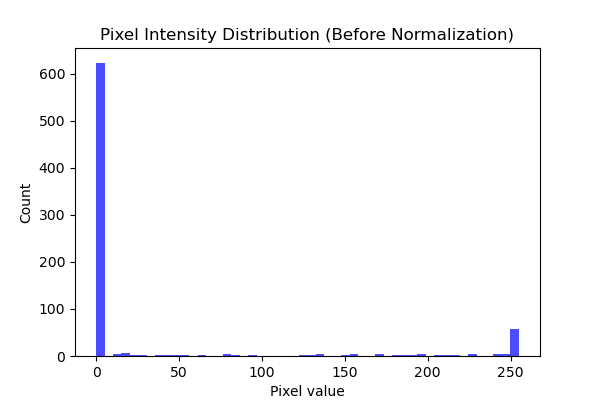

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(x_train[0].reshape(-1), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution (Before Normalization)")
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()


### ⚙️

This section prepares the MNIST dataset for training by normalizing, reshaping, and encoding the data:

- **Normalization**  
  - `x_train = x_train.astype('float32') / 255.0`  
  - `x_test = x_test.astype('float32') / 255.0`  
  Converts pixel values from integers (0–255) to floating-point numbers between 0 and 1.  
  ✅ This improves training stability and model convergence.

- **Reshaping**  
  - `x_train = x_train.reshape(-1, 28, 28, 1)`  
  - `x_test = x_test.reshape(-1, 28, 28, 1)`  
  Adds a **channel dimension (1)** to each image, making the input shape compatible with CNN layers that expect data in the format *(samples, height, width, channels)*.

- **One-hot encoding**  
  - `y_train_cat = to_categorical(y_train, 10)`  
  - `y_test_cat = to_categorical(y_test, 10)`  
  Converts the digit labels (0–9) into one-hot encoded vectors.  
  Example: label `3` → `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.

- **print()** statements display the new shapes to confirm that the data and labels are correctly formatted for CNN input and training.


In [6]:
# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to (samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data reshaped:", x_train.shape)
print("Labels one-hot encoded:", y_train_cat.shape)


Training data reshaped: (60000, 28, 28, 1)
Labels one-hot encoded: (60000, 10)


### 📉 

This section visualizes the pixel intensity distribution of an MNIST image **after normalization**:

- **plt.figure(figsize=(6, 4))**: creates a 6×4 inch figure for the plot.  
- **plt.hist(x_train[0].reshape(-1), bins=50, color='blue', alpha=0.7)**: flattens the first normalized training image and plots its pixel intensity histogram.  
- **plt.title("Pixel Intensity Distribution (After Normalization)")**: adds a descriptive title indicating that the data is normalized.  
- **plt.xlabel("Pixel value")** and **plt.ylabel("Count")**: label the axes — pixel values now range between **0 and 1** instead of 0–255.  
- **plt.show()**: displays the histogram.

This plot helps confirm that normalization was applied correctly, with pixel values now distributed in a smaller range suitable for neural network training.


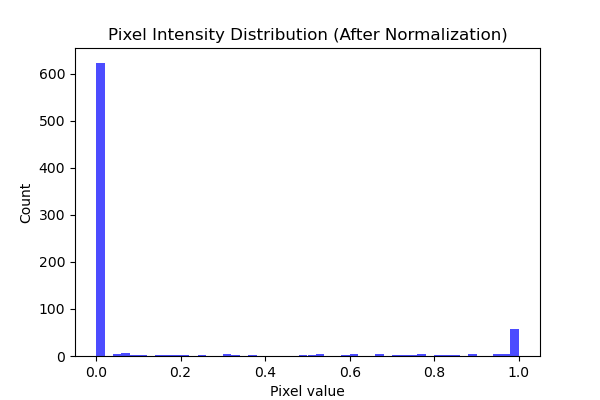

In [7]:
plt.figure(figsize=(6, 4))
plt.hist(x_train[0].reshape(-1), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution (After Normalization)")
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()

### 🧠 Explanation

This section builds and compiles a **Convolutional Neural Network (CNN)** model for handwritten digit classification using TensorFlow Keras:

- **Sequential([...])**: creates a sequential model where layers are stacked one after another.

#### 🏗️ Model Architecture
1. **Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))**  
   - First convolutional layer with 32 filters of size 3×3.  
   - Uses **ReLU** activation to introduce non-linearity.  
   - `input_shape=(28,28,1)` specifies grayscale input images of size 28×28 pixels.  

2. **MaxPooling2D(2,2)**  
   - Reduces spatial dimensions by taking the maximum value from each 2×2 region.  
   - Helps decrease computation and prevent overfitting.

3. **Conv2D(64, (3,3), activation='relu')**  
   - Second convolutional layer with 64 filters, extracting deeper features.  

4. **MaxPooling2D(2,2)**  
   - Further reduces the feature map size.  

5. **Flatten()**  
   - Converts the 2D feature maps into a 1D vector for input into dense layers.  

6. **Dense(128, activation='relu')**  
   - Fully connected layer with 128 neurons for feature combination and pattern learning.  

7. **Dropout(0.3)**  
   - Randomly drops 30% of the neurons during training to reduce overfitting.  

8. **Dense(10, activation='softmax')**  
   - Output layer with 10 neurons (for digits 0–9) using **softmax** to output class probabilities.

#### ⚙️ Compilation
- **optimizer='adam'**: adaptive learning rate optimizer that speeds up convergence.  
- **loss='categorical_crossentropy'**: suitable for multi-class classification problems.  
- **metrics=['accuracy']**: tracks model accuracy during training and evaluation.

#### 📋 model.summary()
Displays a summary of the model architecture, including each layer’s output shape and number of trainable parameters.


In [8]:


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/home/gato/anaconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761558727.140299    5242 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1722 MB memory:  -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### ⚙️ Explanation

This section checks the TensorFlow installation details and verifies GPU availability:

- **import tensorflow as tf**: imports the TensorFlow library.  
- **print(tf.__version__)**: displays the installed TensorFlow version to confirm compatibility with your environment.  
- **print(tf.test.is_built_with_cuda())**: returns `True` if TensorFlow was compiled with CUDA support, meaning it can use NVIDIA GPUs for acceleration.  
- **print(tf.config.list_physical_devices('GPU'))**: lists all available GPU devices recognized by TensorFlow.  
  - If a GPU is detected (e.g., `NVIDIA GeForce MX350`), it will appear in the output.  
  - If the list is empty, TensorFlow is running on the CPU instead.

This step ensures that TensorFlow is properly configured to leverage GPU resources for faster training.


In [9]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))


2.20.0
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 🔍 Explanation

This section verifies whether TensorFlow can detect and use a GPU for computation:

- **import tensorflow as tf**: imports the TensorFlow library.  
- **print("TensorFlow version:", tf.__version__)**: displays the currently installed TensorFlow version.  
- **tf.test.is_gpu_available()**: returns `True` if a GPU device is available and recognized by TensorFlow. *(Note: This function is deprecated in TensorFlow 2.10+, but still works in some environments.)*  
- **tf.test.gpu_device_name()**: prints the name of the detected GPU device (e.g., `/device:GPU:0`). If it returns an empty string, no GPU was found.  

This test helps confirm that TensorFlow has access to your GPU drivers, CUDA, and cuDNN libraries for hardware acceleration.


In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.test.is_gpu_available())
print("GPU device name:", tf.test.gpu_device_name())


TensorFlow version: 2.20.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available: True
GPU device name: /device:GPU:0


I0000 00:00:1761558759.305434    5242 gpu_device.cc:2020] Created device /device:GPU:0 with 1722 MB memory:  -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1761558759.306607    5242 gpu_device.cc:2020] Created device /device:GPU:0 with 1722 MB memory:  -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1


### 🧩 Explanation

This section lists all devices currently visible to TensorFlow:

- **import tensorflow as tf**: imports the TensorFlow library.  
- **tf.config.get_visible_devices()**: returns a list of all hardware devices that TensorFlow can access, such as CPUs, GPUs, and TPUs.  

Each device entry includes information like its type (e.g., `GPU` or `CPU`) and name.  
✅ If your GPU (e.g., *NVIDIA GeForce MX350*) appears in the list, it means TensorFlow has successfully detected it and can use it for computation.


In [11]:
import tensorflow as tf
print(tf.config.get_visible_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 🧠 Model Training

This block trains the model using the training data.

```python
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)


In [12]:
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)


Epoch 1/10


2025-10-27 12:52:50.393387: I external/local_xla/xla/service/service.cc:163] XLA service 0x7dbbb800aa10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-27 12:52:50.393407: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX350, Compute Capability 6.1
2025-10-27 12:52:50.424677: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-27 12:52:50.583696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-10-27 12:52:51.037065: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{} for conv (f32[64,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convB

750/750 - 9s - 12ms/step - accuracy: 0.9285 - loss: 0.2335 - val_accuracy: 0.9807 - val_loss: 0.0672
Epoch 2/10
750/750 - 4s - 5ms/step - accuracy: 0.9773 - loss: 0.0742 - val_accuracy: 0.9853 - val_loss: 0.0506
Epoch 3/10
750/750 - 4s - 6ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9889 - val_loss: 0.0377
Epoch 4/10
750/750 - 4s - 6ms/step - accuracy: 0.9864 - loss: 0.0421 - val_accuracy: 0.9886 - val_loss: 0.0381
Epoch 5/10
750/750 - 4s - 5ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9898 - val_loss: 0.0341
Epoch 6/10
750/750 - 4s - 5ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9895 - val_loss: 0.0385
Epoch 7/10
750/750 - 4s - 5ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9912 - val_loss: 0.0313
Epoch 8/10
750/750 - 4s - 6ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9912 - val_loss: 0.0315
Epoch 9/10
750/750 - 4s - 6ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9911 - val_loss: 0.0361
Epoch 10/10

### ✅ Model Evaluation

This block evaluates the trained model on unseen test data.

```python
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

### Explanation

- `model.evaluate()` computes the loss and metrics (like accuracy) on the test dataset.  
- `x_test`: test images.  
- `y_test_cat`: one-hot encoded test labels.  
- `verbose=0`: suppresses detailed output during evaluation.  
- `test_acc`: indicates how well the model performs on new, unseen data.  

The print statement shows the test accuracy rounded to four decimal places — a key metric for judging how well the trained model generalizes beyond the training data.



In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


2025-10-27 12:53:42.929535: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{} for conv (f32[16,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


Test accuracy: 0.9917


### Explanation

- `model.predict(x_test)`: generates probability predictions for each test image.  
- `np.argmax(..., axis=1)`: selects the class with the highest probability for each prediction, giving final class labels (0–9).  
- `confusion_matrix(y_test, y_pred)`: computes a table comparing actual vs. predicted labels to evaluate classification performance.  
- `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')`: visualizes the confusion matrix as a heatmap where darker cells represent higher counts.  
- The x-axis (Predicted) shows model outputs, and the y-axis (Actual) shows true labels.  
- A perfect model would have all values concentrated along the diagonal, meaning all predictions are correct.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


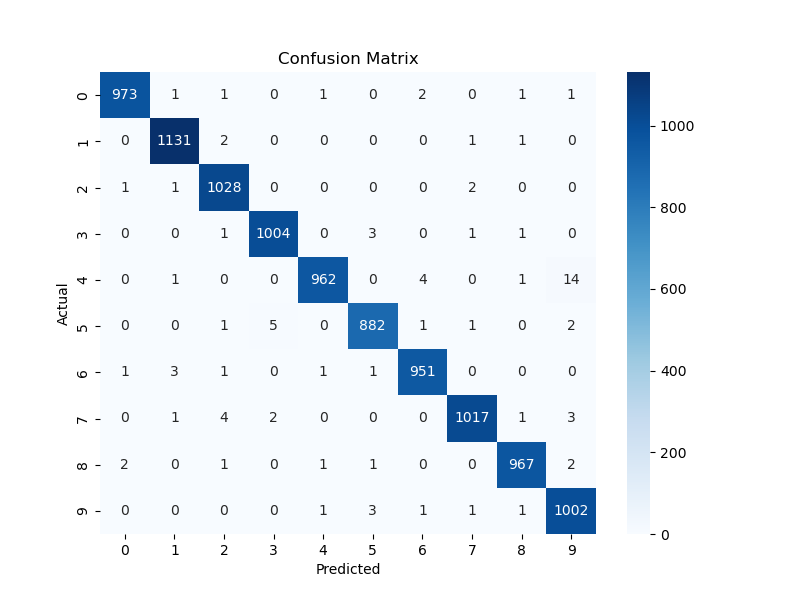

In [14]:

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


A perfect model would have all values along the diagonal.
Off-diagonal values show where the model confuses one digit for another.

### Explanation

- `model.predict(x_test)`: produces probability scores for each digit class (0–9) for all test images.  
- `np.argmax(predictions, axis=1)`: converts the probabilities into final predicted class labels by selecting the class with the highest probability.  
- The loop displays the first 9 test images along with their predicted and true labels.  
- `plt.imshow(...)`: shows each digit in grayscale.  
- `plt.title(f"Pred: {predicted_labels[i]}, True: {y_test[i]}")`: adds a title showing both predicted and actual labels for comparison.  
- `plt.axis('off')`: hides the axis for a cleaner display.  
- This visualization helps quickly assess how accurate the model’s predictions are on individual samples.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


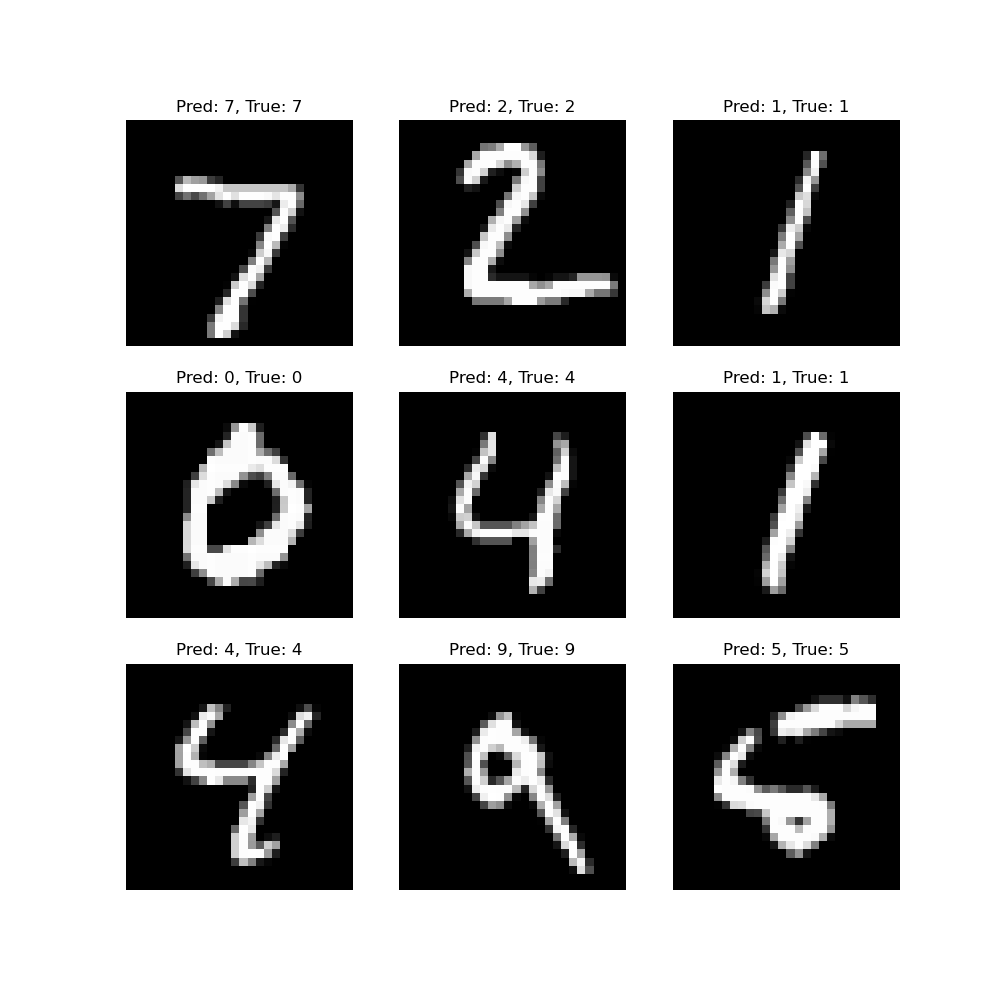

In [15]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()


### Explanation

- This code creates an **interactive digit drawing interface** where users can draw digits directly on a 28×28 pixel canvas and have the trained model predict what digit they drew.  

- `img = np.zeros((28, 28))`: initializes a blank 28×28 image array (all black).  
- `plt.subplots_adjust(bottom=0.2)`: leaves space at the bottom for control buttons.  
- `imshow(img, cmap='gray')`: displays the drawing area in grayscale.  
- Event handlers:
  - `on_press` and `on_release`: detect when the user starts and stops drawing with the mouse.  
  - `draw`: updates pixel values as the user drags the mouse to simulate drawing.  
- `img[y-1:y+2, x-1:x+2] = 1`: creates a small brush stroke by setting nearby pixels to white.  

- `predict`: reshapes the drawn image to match the model’s input size `(1, 28, 28, 1)` and predicts the digit using the trained CNN model. The predicted digit is displayed in the plot title.  
- `clear`: resets the canvas so the user can draw again.  

- Two interactive buttons are created:  
  - **Clear**: clears the drawing area.  
  - **Predict**: triggers digit prediction.  

- Finally, `mpl_connect` links mouse actions (`press`, `release`, and `motion`) to the corresponding functions, enabling live drawing and interaction.  
- This provides a simple and intuitive demo to visualize and test the model in real time.


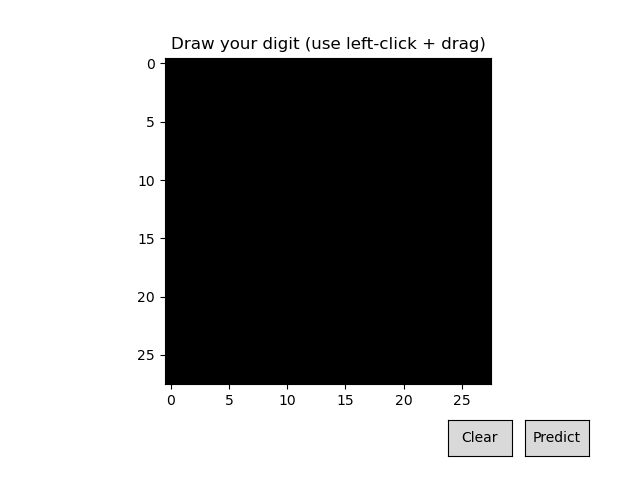

In [16]:
from matplotlib.widgets import Button
# --- Interactive canvas setup ---
img = np.zeros((28, 28))

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
canvas = ax.imshow(img, cmap='gray', vmin=0, vmax=1)
ax.set_title("Draw your digit (use left-click + drag)")

is_drawing = False

def on_press(event):
    global is_drawing
    if event.inaxes == ax:
        is_drawing = True
        draw(event)

def on_release(event):
    global is_drawing
    is_drawing = False

def draw(event):
    if is_drawing and event.inaxes == ax:
        x, y = int(event.xdata), int(event.ydata)
        if 0 <= x < 28 and 0 <= y < 28:
            img[y-1:y+2, x-1:x+2] = 1  # small brush
            canvas.set_data(img)
            plt.draw()

def predict(event):
    global img
    data = img.reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(data, verbose=0))
    ax.set_title(f"Predicted Digit: {pred}")
    plt.draw()

def clear(event):
    global img
    img[:] = 0
    canvas.set_data(img)
    ax.set_title("Draw your digit (use left-click + drag)")
    plt.draw()

# --- Button setup ---
ax_clear = plt.axes([0.7, 0.05, 0.1, 0.075])
ax_predict = plt.axes([0.82, 0.05, 0.1, 0.075])
b_clear = Button(ax_clear, 'Clear')
b_predict = Button(ax_predict, 'Predict')

b_clear.on_clicked(clear)
b_predict.on_clicked(predict)

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', draw)

plt.show()
